In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sbs

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
df=pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])

In [5]:
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [6]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [7]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [8]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [9]:
X=df.iloc[:,1:3]
Y=df.iloc[:,0]

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

C:\Users\acer\AppData\Local\Temp\ipykernel_8252\4194183962.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbs.distplot(X_train["Age"])


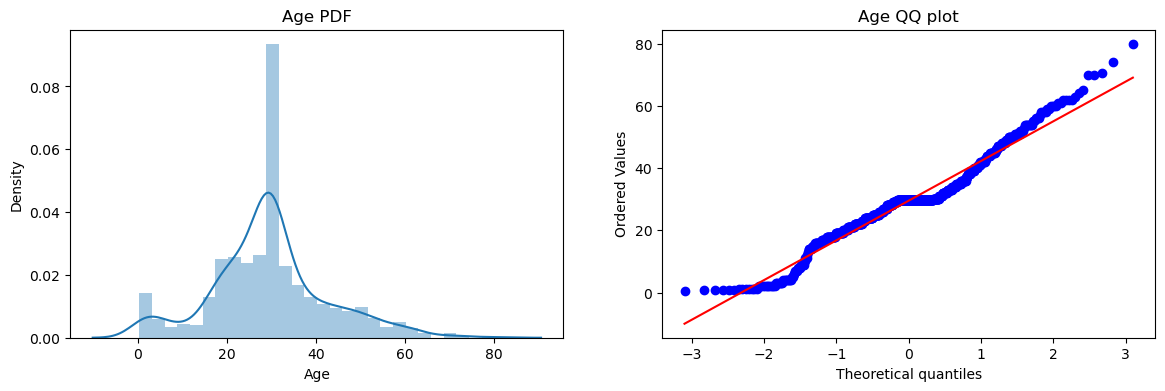

In [11]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sbs.distplot(X_train["Age"])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train["Age"],dist="norm",plot=plt)
plt.title("Age QQ plot")

plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_8252\3363055257.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbs.distplot(X_train["Fare"])


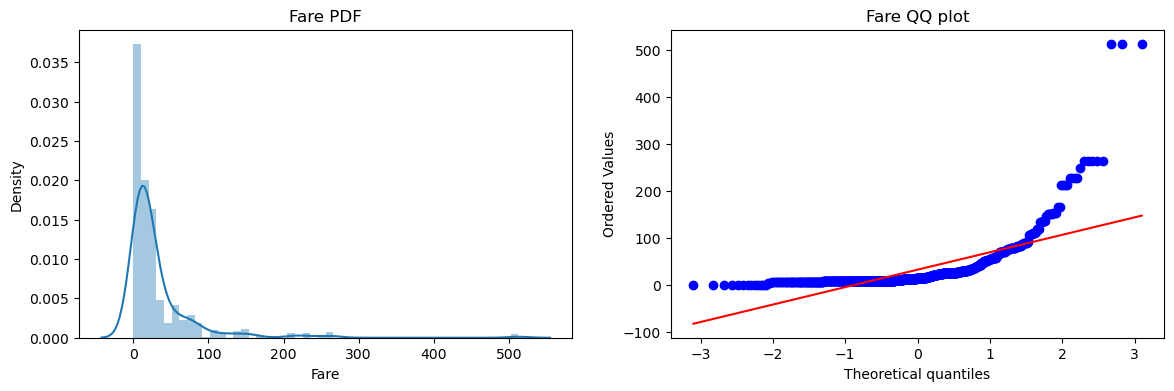

In [12]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sbs.distplot(X_train["Fare"])
plt.title("Fare PDF")

plt.subplot(122)
stats.probplot(X_train["Fare"],dist="norm",plot=plt)
plt.title("Fare QQ plot")

plt.show()

In [13]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

In [14]:
clf1.fit(X_train,Y_train)
clf2.fit(X_train,Y_train)

y_pred1=clf1.predict(X_test)
y_pred2=clf2.predict(X_test)

accuracy1=accuracy_score(y_pred1,Y_test)
accuracy2=accuracy_score(y_pred2,Y_test)
print("Logistic Regression Accuracy Score is",accuracy1)
print("Decision Treee Accuracy Score is",accuracy2)

Logistic Regression Accuracy Score is 0.6480446927374302
Decision Treee Accuracy Score is 0.6871508379888268


In [15]:
trf1=FunctionTransformer(func=np.log1p)


In [16]:
X_train_transformed=trf1.fit_transform(X_train)
X_test_transformed=trf1.fit_transform(X_test)

In [17]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

In [22]:
clf1.fit(X_train_transformed,Y_train)
clf2.fit(X_train_transformed,Y_train)


DecisionTreeClassifier()

In [23]:
y_pred=clf1.predict(X_test_transformed)
y_pred1=clf2.predict(X_test_transformed)

In [24]:
print("Logistic regression Accuracy:",accuracy_score(y_pred,Y_test))
print("Decision Tree Accuracy:",accuracy_score(y_pred1,Y_test))

Logistic regression Accuracy: 0.6815642458100558
Decision Tree Accuracy: 0.6927374301675978


In [26]:
X_transformed=trf1.fit_transform(X)

clf_1=LogisticRegression()
clf_2=DecisionTreeClassifier()

print("Accuracy_1",np.mean(cross_val_score(clf_1,X_transformed,Y,scoring="accuracy",cv=10)))
print("Accuracy_2",np.mean(cross_val_score(clf_2,X_transformed,Y,scoring="accuracy",cv=10)))


Accuracy_1 0.678027465667915
Accuracy_2 0.6622097378277154


## Here you can see that Accuracy after aplying function transformer is more greater than previous accuracy of the data without using function transformer. 

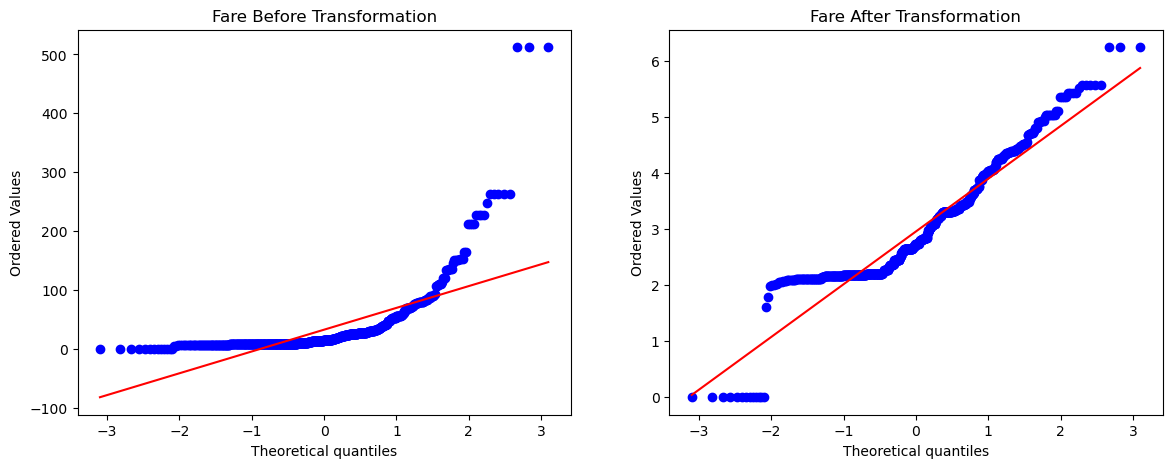

In [30]:
plt.figure(figsize=(14,5))

plt.subplot(121)
stats.probplot(X_train["Fare"],dist='norm',plot=plt)
plt.title("Fare Before Transformation")

plt.subplot(122)
stats.probplot(X_train_transformed["Fare"],dist='norm',plot=plt)
plt.title("Fare After Transformation")
plt.show()

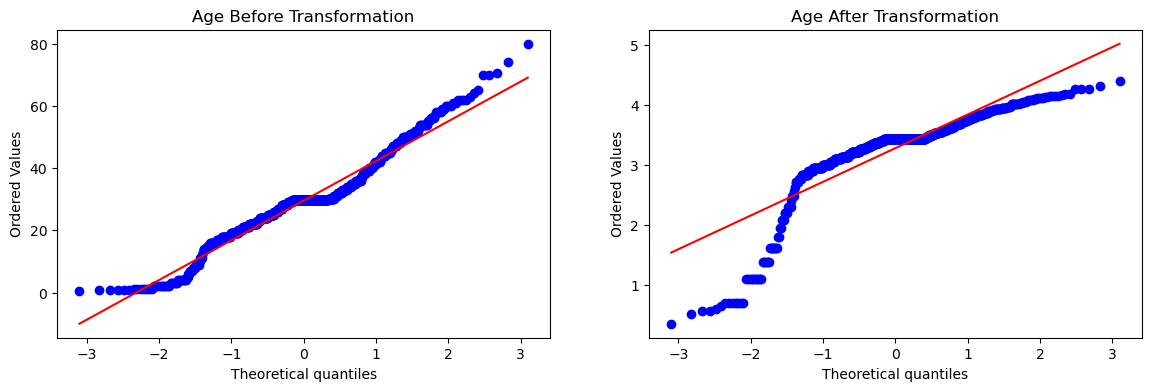

In [32]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train["Age"],dist='norm',plot=plt)
plt.title("Age Before Transformation")

plt.subplot(122)
stats.probplot(X_train_transformed["Age"],dist='norm',plot=plt)
plt.title("Age After Transformation")

plt.show()

In [33]:
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder="passthrough")

X_train_transformed2=trf2.fit_transform(X_train)
X_test_transformed2=trf2.fit_transform(X_test)

In [35]:
clf_a=LogisticRegression()
clf_b=DecisionTreeClassifier()

clf_a.fit(X_train_transformed2,Y_train)
clf_b.fit(X_train_transformed2,Y_train)

DecisionTreeClassifier()

In [36]:
y_prediction=clf_a.predict(X_test_transformed2)
y_prediction1=clf_b.predict(X_test_transformed2)

In [37]:
print("Accuracy 1:",accuracy_score(y_prediction,Y_test))
print("Accuracy 2:",accuracy_score(y_prediction1,Y_test))

Accuracy 1: 0.6703910614525139
Accuracy 2: 0.6703910614525139


In [40]:
X_transformed1=trf2.fit_transform(X)

CLF=LogisticRegression()
CLF2=DecisionTreeClassifier()

print("Accuracy 1:",cross_val_score(CLF,X_transformed1,Y,scoring="accuracy",cv=10))
print("accuracy 2:",cross_val_score(CLF2,X_transformed1,Y,scoring="accuracy",cv=10))

Accuracy 1: [0.57777778 0.56179775 0.69662921 0.73033708 0.66292135 0.68539326
 0.70786517 0.70786517 0.73033708 0.65168539]
accuracy 2: [0.63333333 0.66292135 0.59550562 0.65168539 0.66292135 0.70786517
 0.73033708 0.64044944 0.64044944 0.6741573 ]


In [41]:
X_transformed1=trf1.fit_transform(X)

clfA=LogisticRegression()
clfB=DecisionTreeClassifier()

print("Accuracy_1",np.mean(cross_val_score(clfA,X_transformed1,Y,scoring="accuracy",cv=10)))
print("Accuracy_2",np.mean(cross_val_score(clfB,X_transformed1,Y,scoring="accuracy",cv=10)))


Accuracy_1 0.678027465667915
Accuracy_2 0.6599375780274657


In [42]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6195131086142323


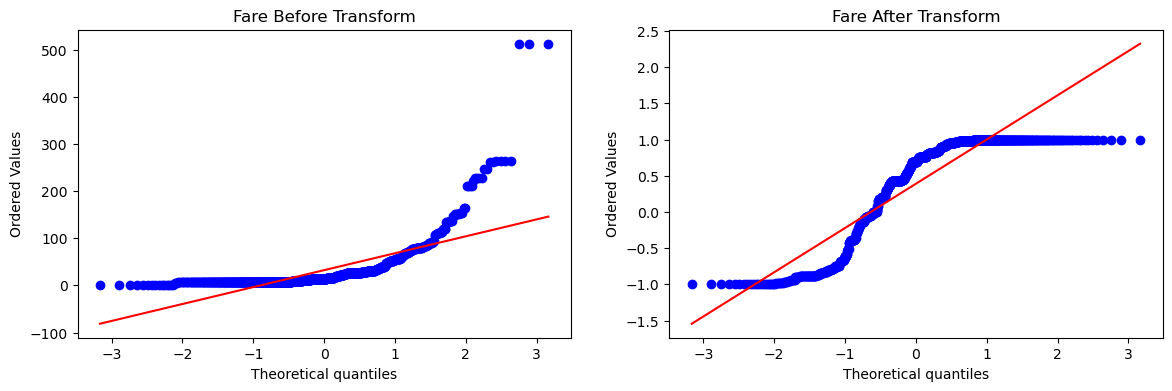

In [49]:
apply_transform(np.)

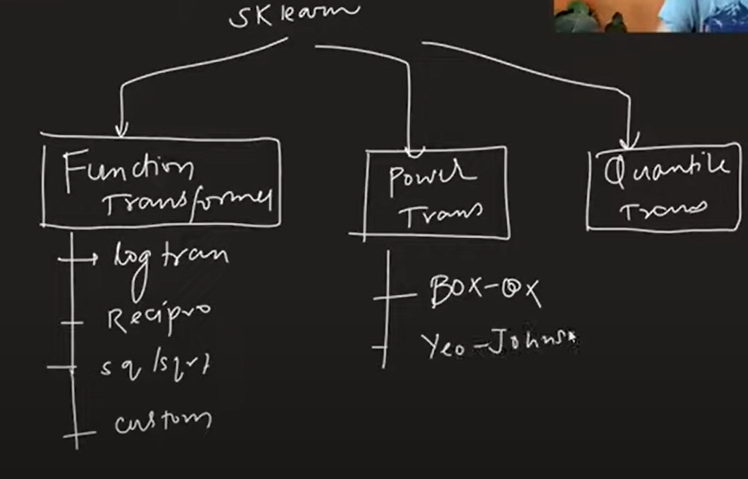

### From the above we can see that Transformation Plays Important role in ML models while in Some Models Like Decision Tree , it will transform the data completely and make them use,

## Why we do Transformation...?<br>->It will convert the data in Normal Distribution , which is generally required and make data normally distribute¶

## 1. When the Data is Right Skewed we use Reciprocal Transformation.<br>2.When the data is left Skewed we use Square Transformation.

### We used QQ plot for Distribution of Data and nomalization of data

# Conclude